In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install openpyxl
!pip install scikit-learn
!pip install statsmodels

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
# READ THE DATA

data = pd.read_csv(r"C:\Users\aleks\Desktop\Lessons\Week_9\project_2\data\parkinsons.data")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.shape


(195, 24)

In [5]:
print(data.dtypes)

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


Having a look at the dataset all the atttributes in this data set are numeric and expected to be so there is no need to convert any of it. 

In [6]:
# Checking for missing values

missing_values = data.isnull().sum()
print(missing_values)

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [7]:
percent_missing = (data.isnull().sum() / len(data)) * 100
print(percent_missing) #Percentage of missing values in each column

name                0.0
MDVP:Fo(Hz)         0.0
MDVP:Fhi(Hz)        0.0
MDVP:Flo(Hz)        0.0
MDVP:Jitter(%)      0.0
MDVP:Jitter(Abs)    0.0
MDVP:RAP            0.0
MDVP:PPQ            0.0
Jitter:DDP          0.0
MDVP:Shimmer        0.0
MDVP:Shimmer(dB)    0.0
Shimmer:APQ3        0.0
Shimmer:APQ5        0.0
MDVP:APQ            0.0
Shimmer:DDA         0.0
NHR                 0.0
HNR                 0.0
status              0.0
RPDE                0.0
DFA                 0.0
spread1             0.0
spread2             0.0
D2                  0.0
PPE                 0.0
dtype: float64


There are no missing values in this dataset.

In [8]:
data.isnull()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
null_counts = data.isnull().sum()
null_counts

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There are no null values either. 

In [10]:
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [11]:
# Renaming columns

new_columns= { 'MDVP:Fo(Hz)' : 'mdvp_fo_hz',
                'MDVP:Fhi(Hz)' : 'mdvp_fhi_hz',
                 'MDVP:Flo(Hz)' : 'mdvp_flo_hz',
                 'MDVP:Jitter(%)' : 'mdvp_jitter_perc',
                  'MDVP:Jitter(Abs)' : 'mdvp_jitter_abs',
                  'MDVP:RAP' : 'mdvp_rap',
                  'MDVP:PPQ' : 'mdvp_ppq',
                  'Jitter:DDP' : 'jitter_ddp',
                 'MDVP:Shimmer' : 'mdvp_shimmer',
                  'MDVP:Shimmer(dB)' : 'mdvp_shimmer_db',
                  'Shimmer:APQ3' : 'shimmer_apq3',
                 'Shimmer:APQ5' : 'shimmer_apq5',
                 'MDVP:APQ' : 'mdvp_apq',
                 'Shimmer:DDA' : 'shimmer_dda',
                 'NHR' : 'nhr',
                 'HNR' : 'hnr',
                 'RPDE' : 'rpde',
                 'DFA' : 'dfa',
                 'D2' : 'd2',
                 'PPE' : 'ppe'}

In [12]:
data = data.rename(columns=new_columns)

In [13]:
data.rename(columns=new_columns, inplace=True)

In [14]:
print(data.columns)

Index(['name', 'mdvp_fo_hz', 'mdvp_fhi_hz', 'mdvp_flo_hz', 'mdvp_jitter_perc',
       'mdvp_jitter_abs', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp', 'mdvp_shimmer',
       'mdvp_shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'mdvp_apq',
       'shimmer_dda', 'nhr', 'hnr', 'status', 'rpde', 'dfa', 'spread1',
       'spread2', 'd2', 'ppe'],
      dtype='object')


In [15]:
data.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_perc,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [16]:
column_values = data['status'].values
print(column_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [17]:
# Features and labels for the dataset, but not 'status' colum.
features=data.loc[:,data.columns!='status'].values[:,1:]
labels=data.loc[:,'status'].values

In [18]:
# Let's count the values for the 'status' column

print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mdvp_fo_hz,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
mdvp_fhi_hz,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
mdvp_flo_hz,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
mdvp_jitter_perc,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
mdvp_jitter_abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
mdvp_rap,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
mdvp_ppq,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
jitter_ddp,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
mdvp_shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
mdvp_shimmer_db,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [20]:
columns= data.columns
for i in columns:
    print("The unique variables in", i, " column: are", data[i].nunique())

The unique variables in name  column: are 195
The unique variables in mdvp_fo_hz  column: are 195
The unique variables in mdvp_fhi_hz  column: are 195
The unique variables in mdvp_flo_hz  column: are 195
The unique variables in mdvp_jitter_perc  column: are 173
The unique variables in mdvp_jitter_abs  column: are 19
The unique variables in mdvp_rap  column: are 155
The unique variables in mdvp_ppq  column: are 165
The unique variables in jitter_ddp  column: are 180
The unique variables in mdvp_shimmer  column: are 188
The unique variables in mdvp_shimmer_db  column: are 149
The unique variables in shimmer_apq3  column: are 184
The unique variables in shimmer_apq5  column: are 189
The unique variables in mdvp_apq  column: are 189
The unique variables in shimmer_dda  column: are 189
The unique variables in nhr  column: are 185
The unique variables in hnr  column: are 195
The unique variables in status  column: are 2
The unique variables in rpde  column: are 195
The unique variables in df

# The status column has only two variables as PD patients and healthy patients, as per the other variables we can confidentially say that these are continous variables. 

In [21]:
data=data.drop("name", axis=1)
data

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_perc,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


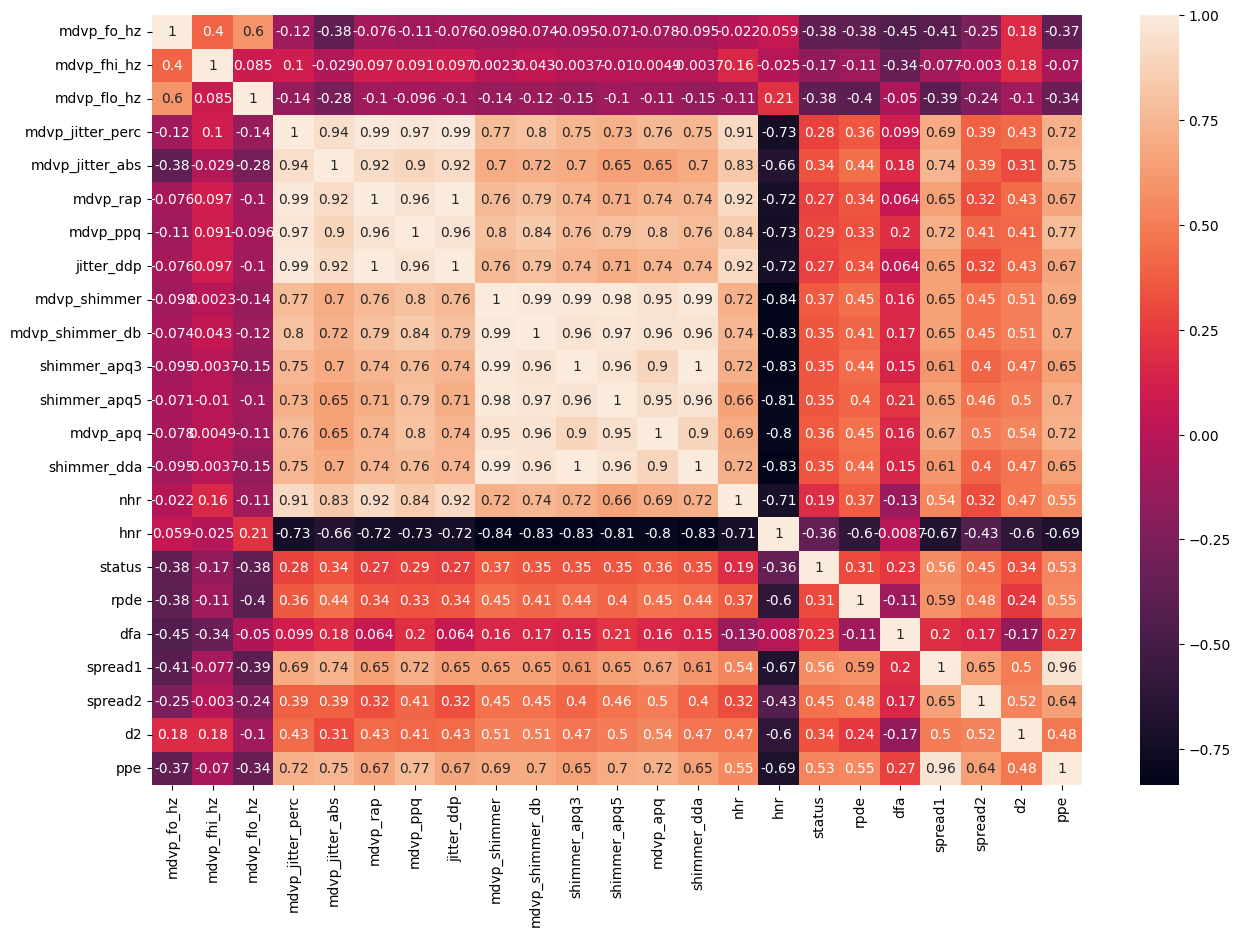

In [22]:
# Checking the correlation between variables. 

fig=plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True);

From the heatmap we can clearly see that a considerate number of the data are possitively correlated. 

# Let's visualize the status distribution between people with parkinson and not. 

([<matplotlib.patches.Wedge at 0x24a5117bfa0>,
 [Text(-0.787158892234798, 0.7683624654911808, 'Parkinson'),
  Text(0.78715892820444, -0.7683624286416129, 'Not parkinson')])

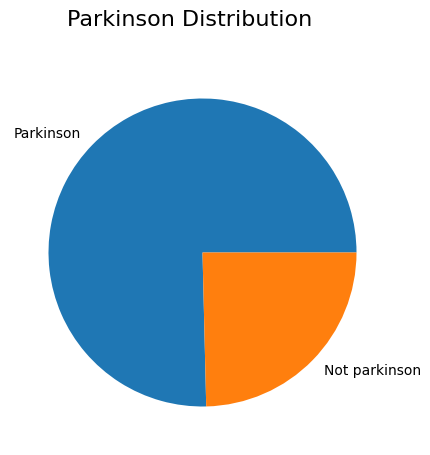

In [23]:
plt.figure(figsize=(10, 5))
plt.suptitle('Parkinson Distribution', 
             fontsize='16')

labels=['Parkinson', 'Not parkinson']
order=data['status'].value_counts().index

plt.pie(data['status'].value_counts(), labels=labels)


<Axes: title={'center': 'Histogram'}, xlabel='Status', ylabel='Total'>

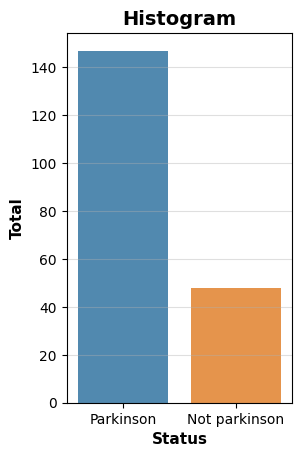

In [24]:
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,)       
        
ax = sns.countplot(x='status', data=data, order=order, alpha=0.85)

plt.xlabel('Status', fontweight='bold', fontsize=11)
plt.ylabel('Total', fontweight='bold', fontsize=11)
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# Let's see mdvp_fo_hz,	mdvp_fhi_hz, mdvp_flo_hz frequency

In [25]:
mdvp_freq=data.iloc[:,0:3]
mdvp_freq

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz
0,119.992,157.302,74.997
1,122.400,148.650,113.819
2,116.682,131.111,111.555
3,116.676,137.871,111.366
4,116.014,141.781,110.655
...,...,...,...
190,174.188,230.978,94.261
191,209.516,253.017,89.488
192,174.688,240.005,74.287
193,198.764,396.961,74.904


In [26]:
# All the columns are floats excluding the 'status' column.
print(data.dtypes)

mdvp_fo_hz          float64
mdvp_fhi_hz         float64
mdvp_flo_hz         float64
mdvp_jitter_perc    float64
mdvp_jitter_abs     float64
mdvp_rap            float64
mdvp_ppq            float64
jitter_ddp          float64
mdvp_shimmer        float64
mdvp_shimmer_db     float64
shimmer_apq3        float64
shimmer_apq5        float64
mdvp_apq            float64
shimmer_dda         float64
nhr                 float64
hnr                 float64
status                int64
rpde                float64
dfa                 float64
spread1             float64
spread2             float64
d2                  float64
ppe                 float64
dtype: object


#  Let's take 'status' col at the end of the dataset.

In [27]:
col=['mdvp_fo_hz', 'mdvp_fhi_hz', 'mdvp_flo_hz', 'mdvp_jitter_perc',
       'mdvp_jitter_abs', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp', 'mdvp_shimmer',
       'mdvp_shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'mdvp_apq',
       'shimmer_dda', 'nhr', 'hnr', 'rpde', 'dfa', 'spread1',
       'spread2', 'd2', 'ppe', 'status']
col

['mdvp_fo_hz',
 'mdvp_fhi_hz',
 'mdvp_flo_hz',
 'mdvp_jitter_perc',
 'mdvp_jitter_abs',
 'mdvp_rap',
 'mdvp_ppq',
 'jitter_ddp',
 'mdvp_shimmer',
 'mdvp_shimmer_db',
 'shimmer_apq3',
 'shimmer_apq5',
 'mdvp_apq',
 'shimmer_dda',
 'nhr',
 'hnr',
 'rpde',
 'dfa',
 'spread1',
 'spread2',
 'd2',
 'ppe',
 'status']

In [28]:
data = data.reindex(columns=col)

In [29]:
data

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_perc,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


# Let's see the distribution for patients with Parkinson

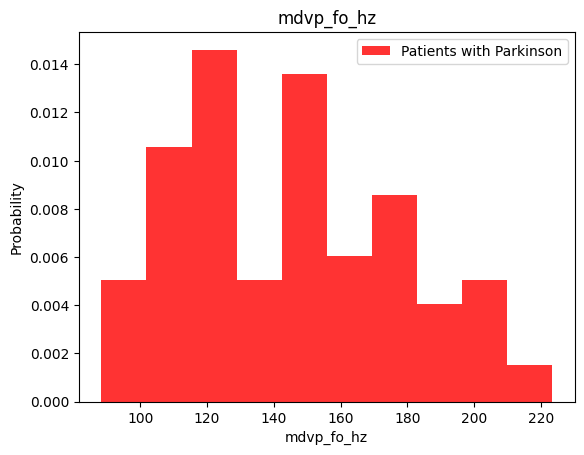

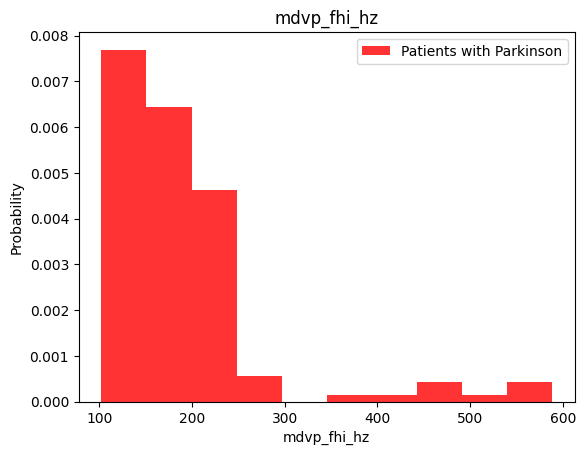

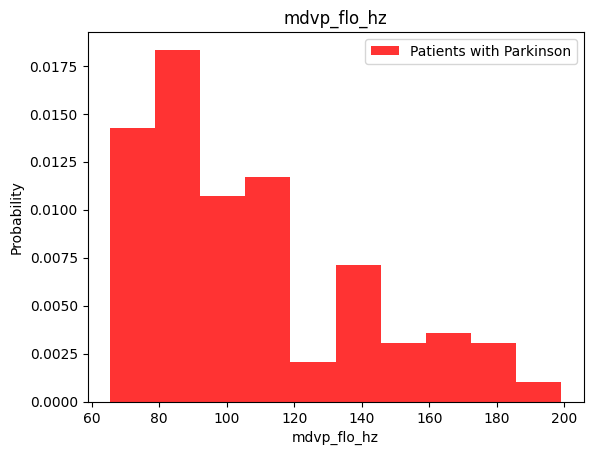

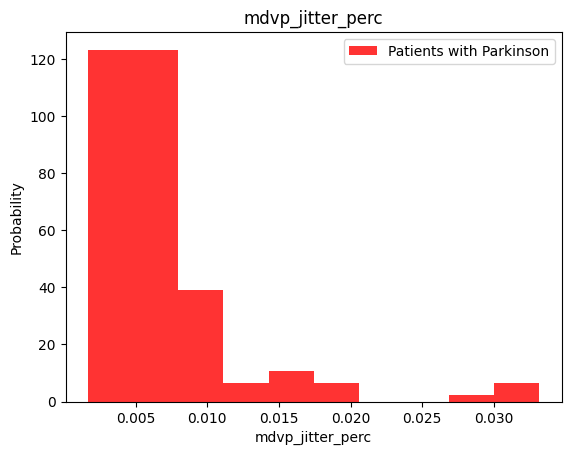

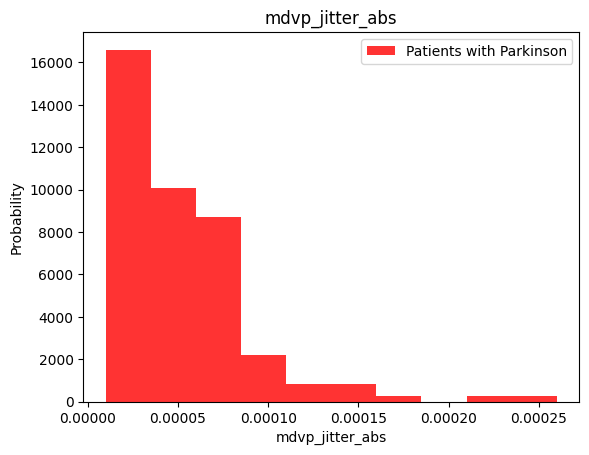

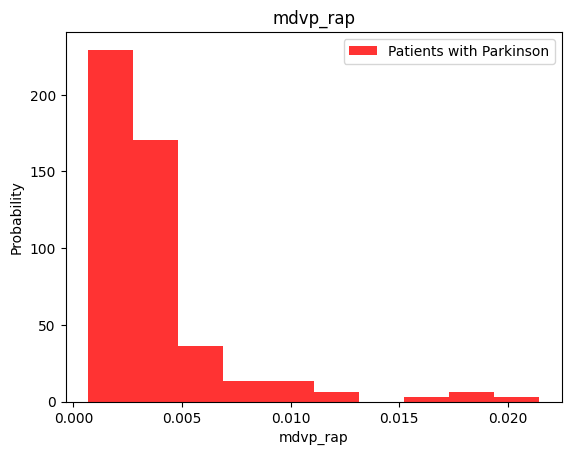

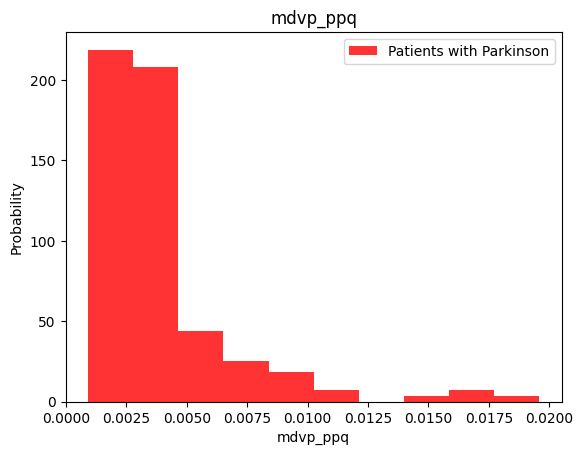

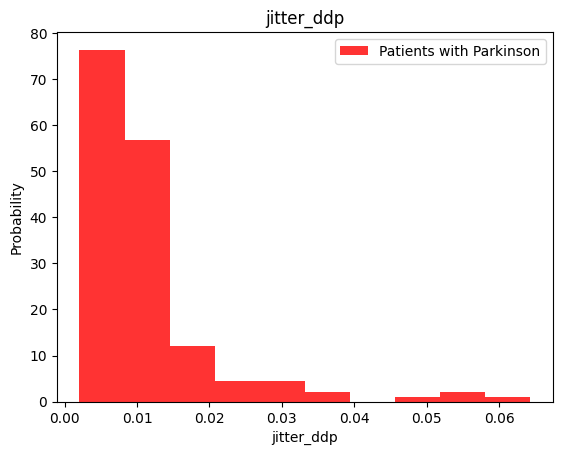

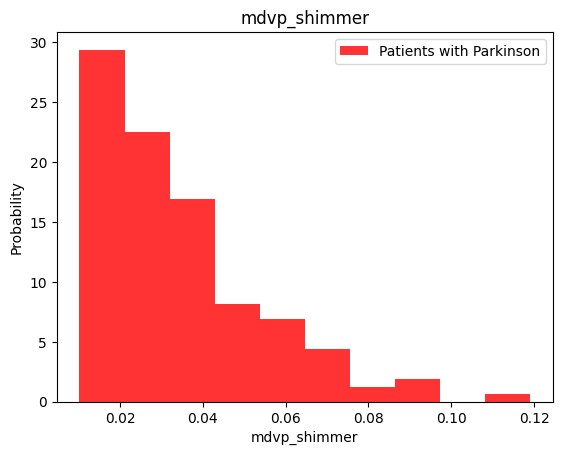

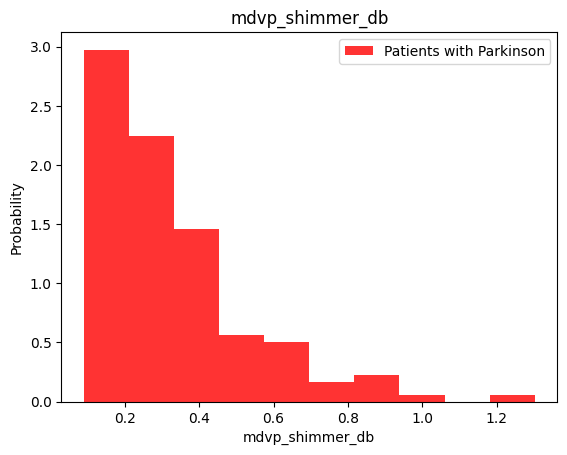

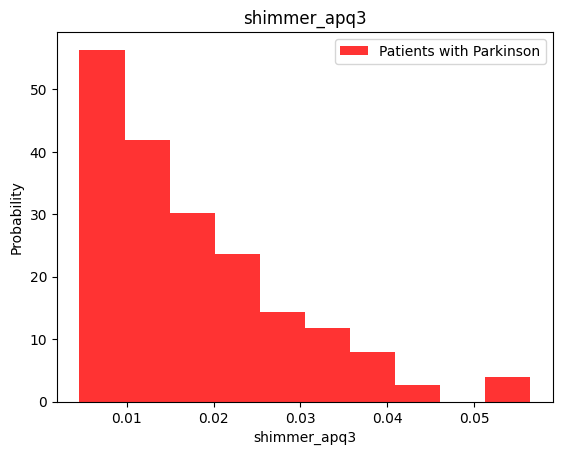

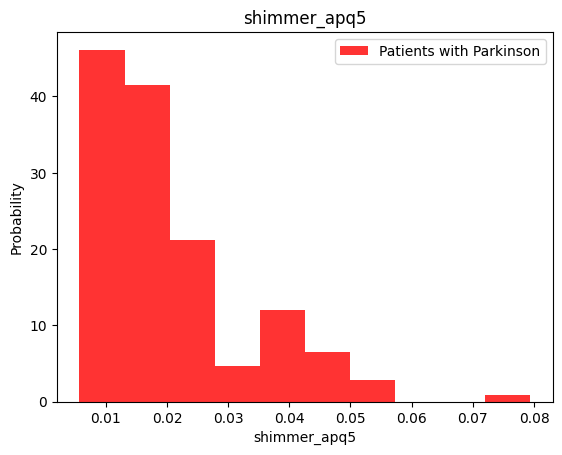

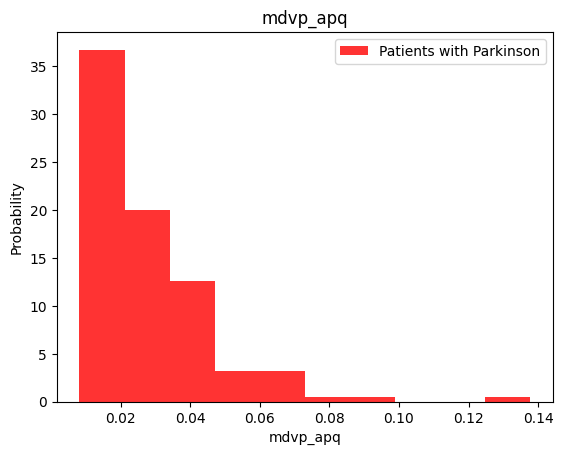

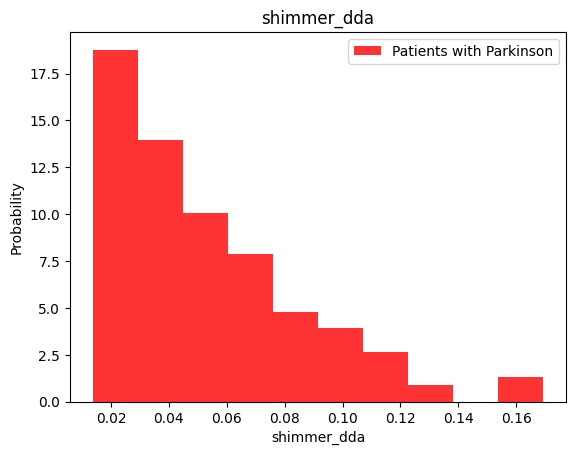

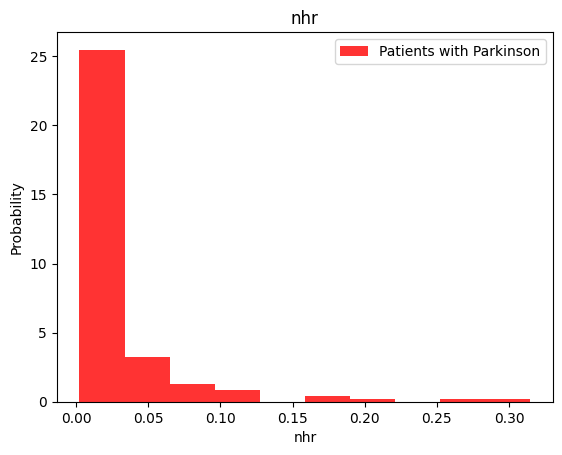

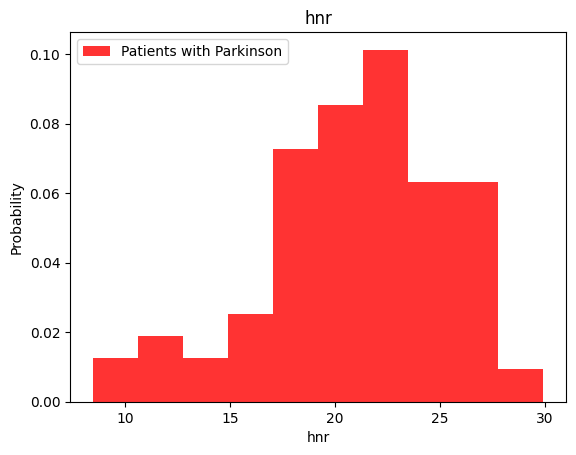

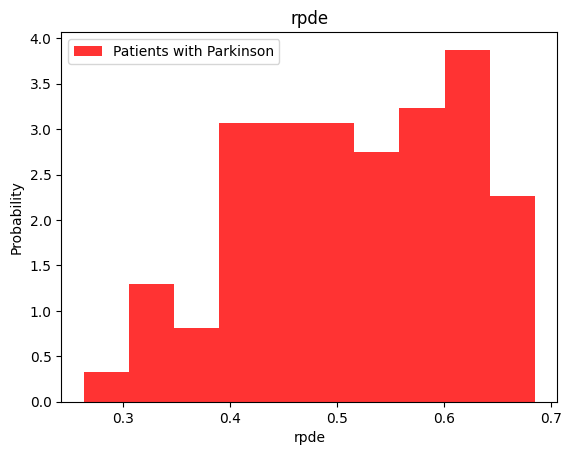

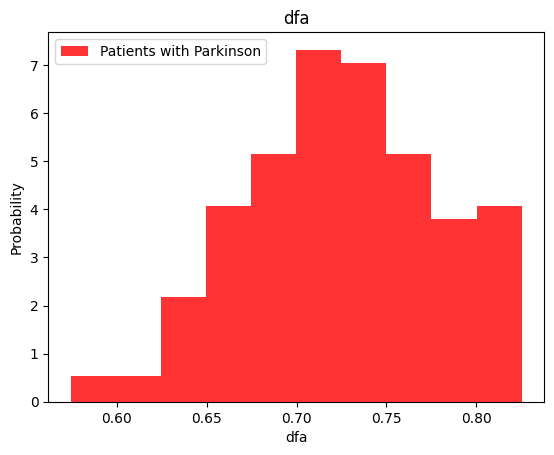

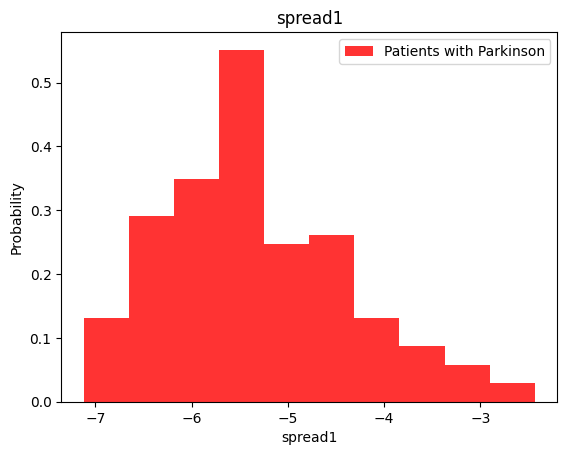

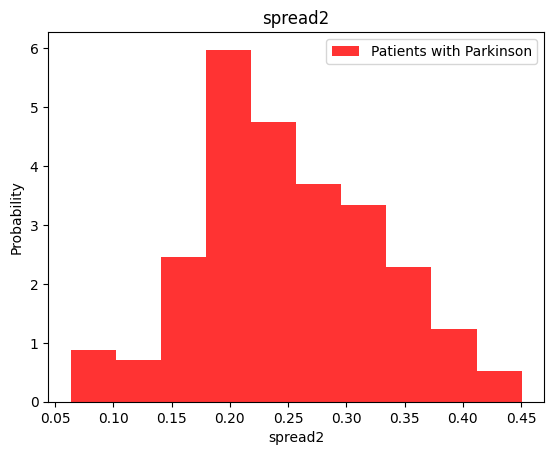

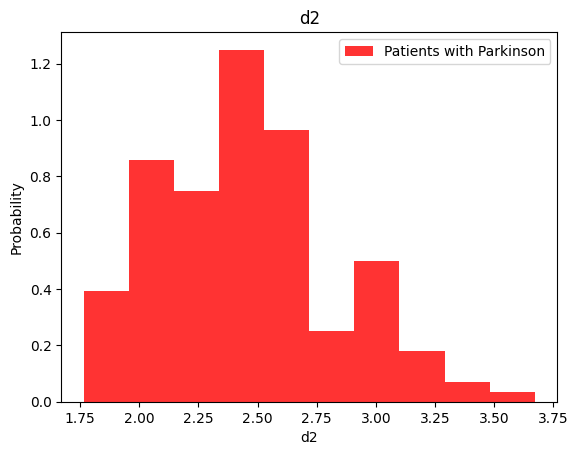

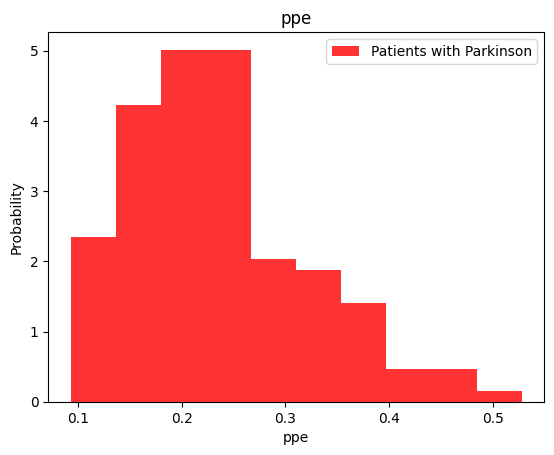

In [30]:
for label in col[:-1]:
    plt.hist(data[data["status"]==1][label], color='red', label='Patients with Parkinson',alpha=0.8, density=True) 
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Now for healthy patients

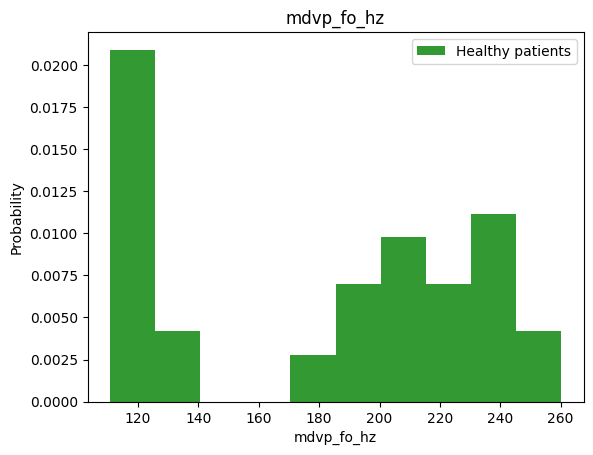

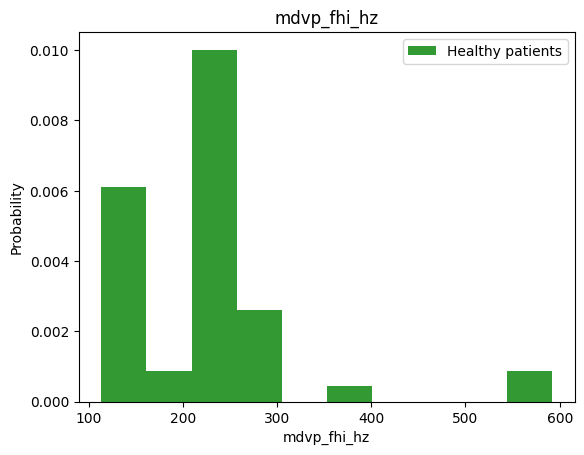

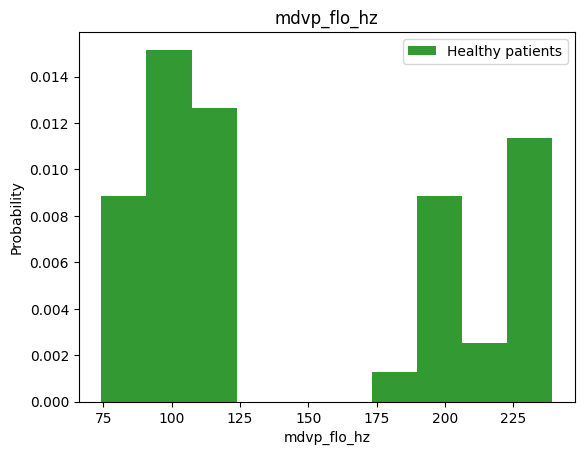

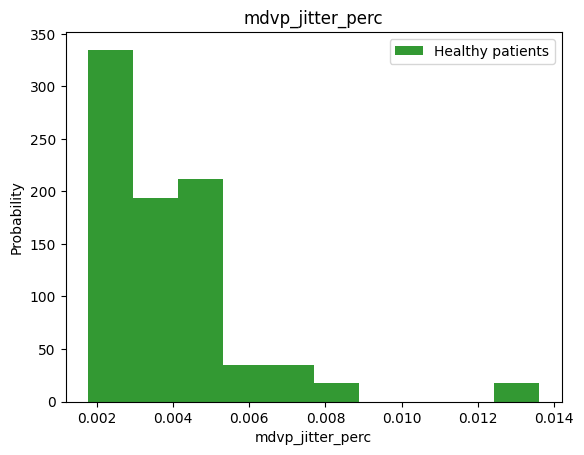

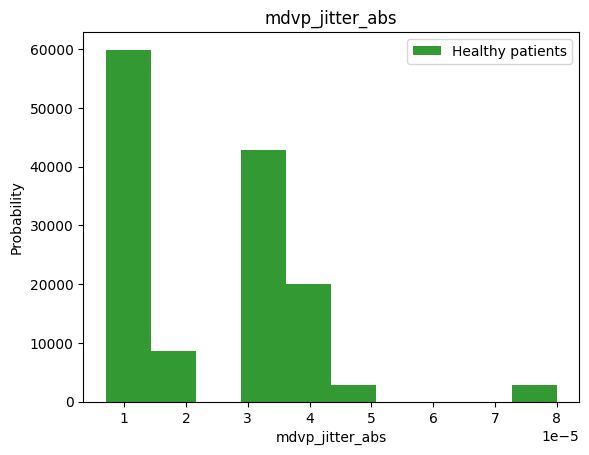

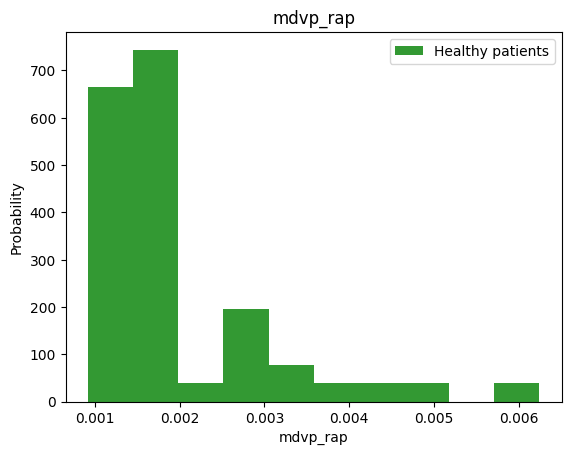

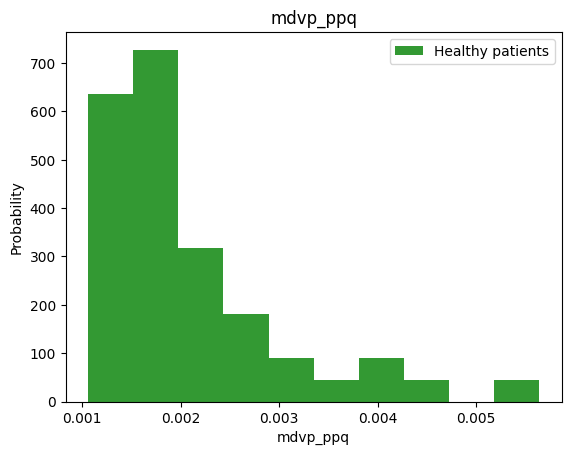

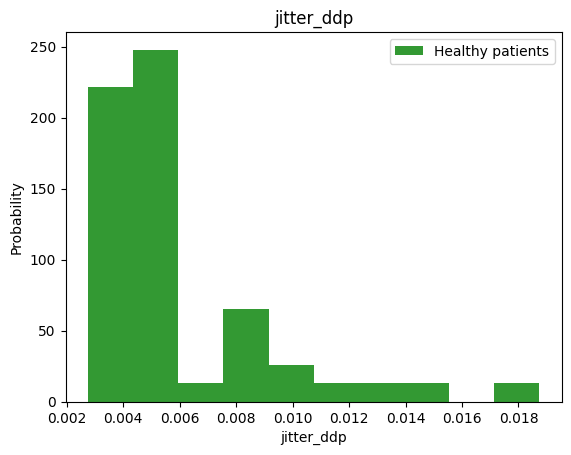

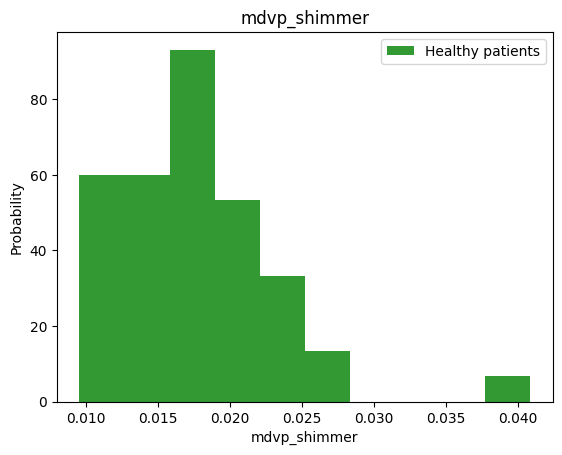

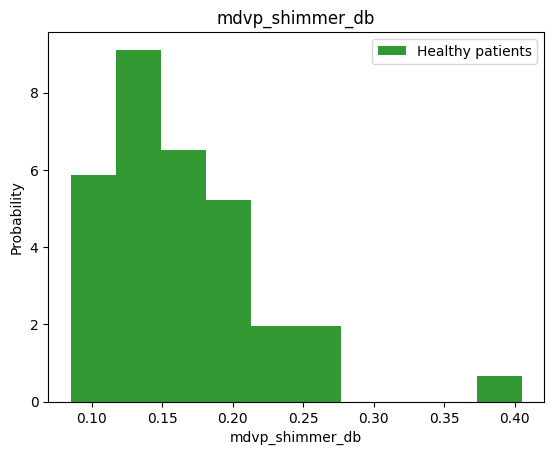

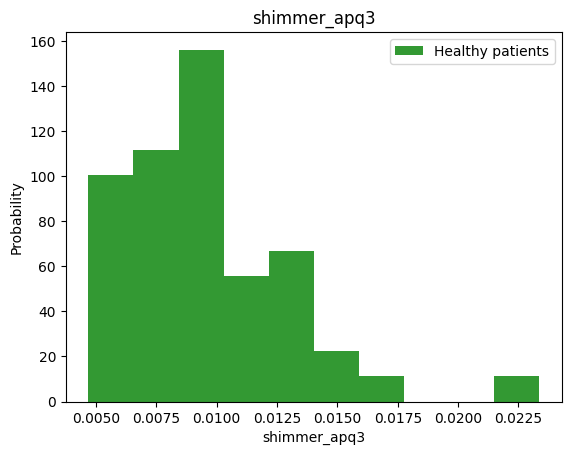

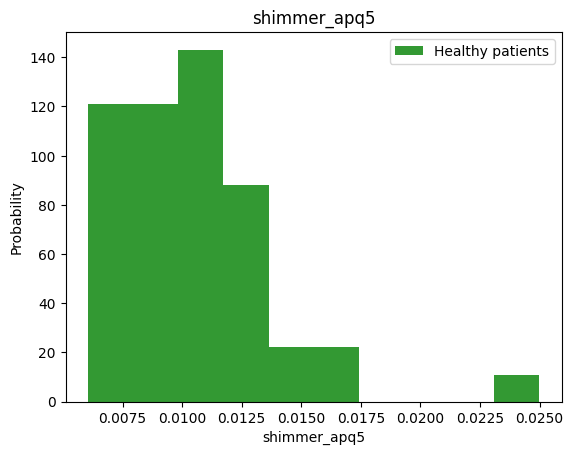

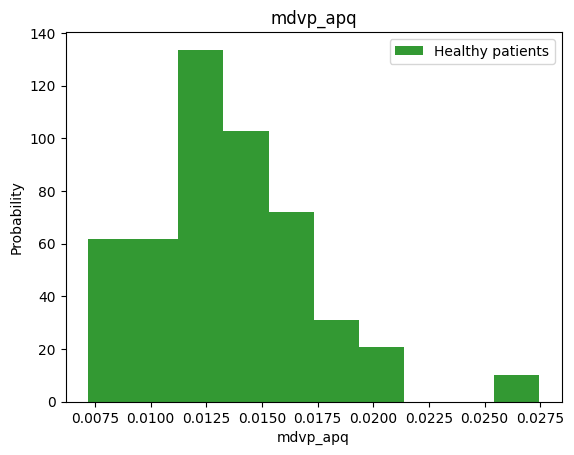

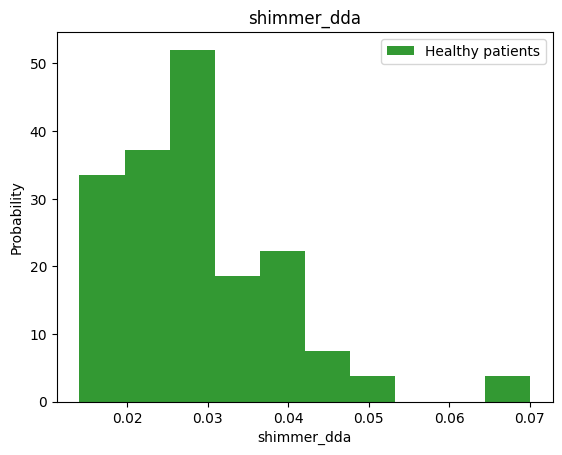

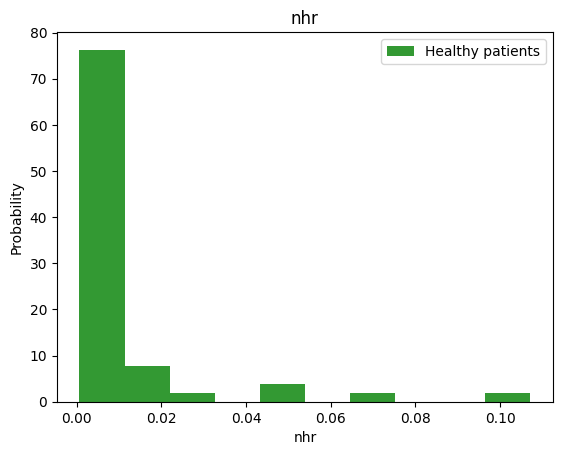

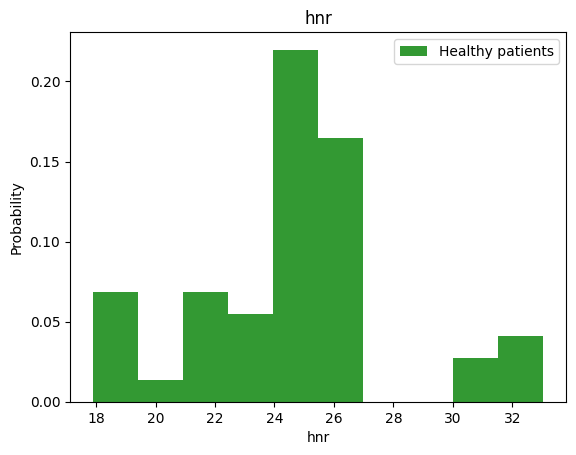

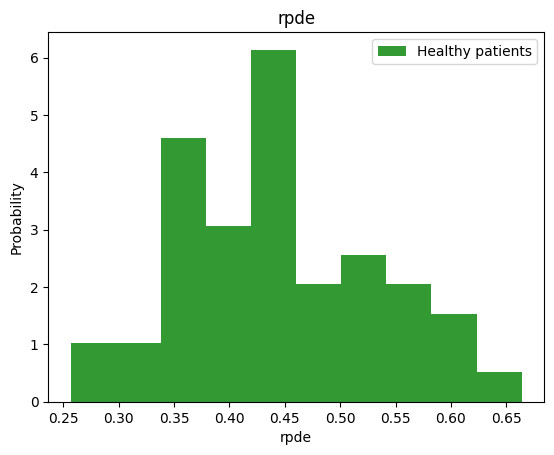

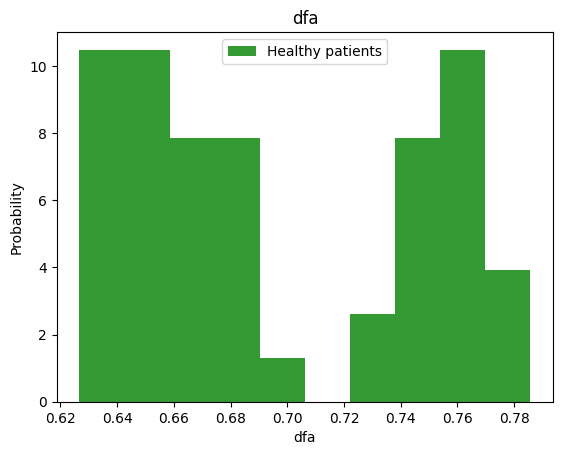

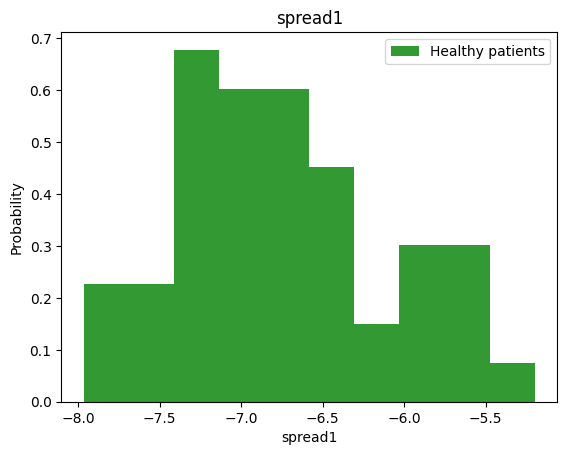

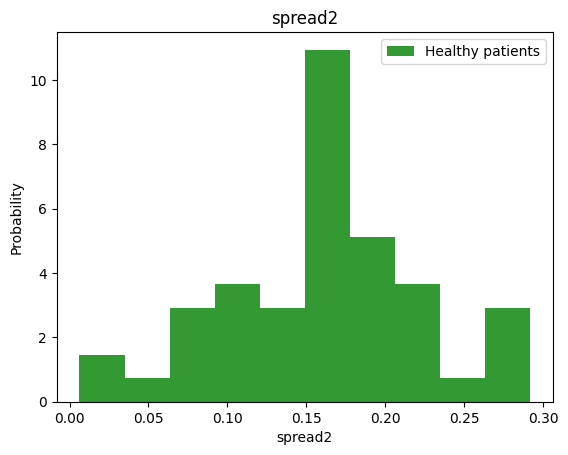

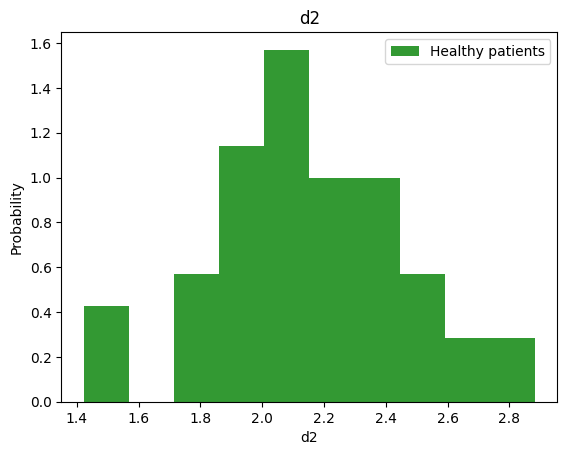

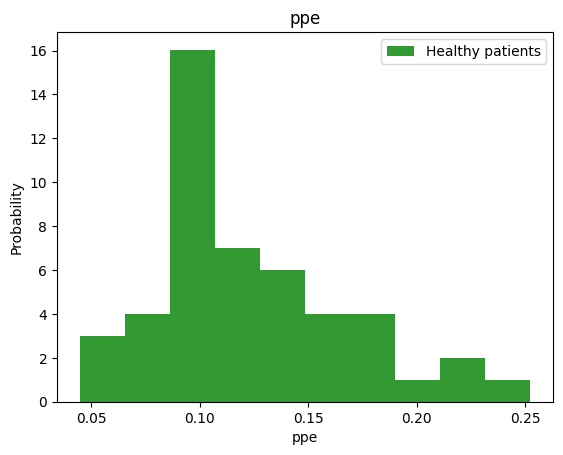

In [31]:
for label in col[:-1]:
    plt.hist(data[data["status"]==0][label], color='green', label='Healthy patients', alpha=0.8, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

The column 'Status' is a categorical variable and has boolean values (0,1), 1 indicates that the subject has PD and 0 indicates that the subject doesnt have PD. Let's make an analysis. 

In [52]:
gr1= 'status'

In [53]:
data_shape=data.shape

In [54]:
data_wPD= data[data[gr1]==1]
data_nPD= data[data[gr1]==0]
num_wPD=data[gr1][data[gr1]==1].count()
num_nPD=data[gr1][data[gr1]==0].count()
print('The number of patients with Parkinson Disease are',num_wPD,'translated as',round(num_wPD/data_shape[0]*100,2),
      'percent of the dataset.')
print('he number of patients who do not have Parkinson Disease are',num_nPD,'translated as',round(num_nPD/data_shape[0]*100,2),
      'percent of the dataset.')

The number of patients with Parkinson Disease are 147 translated as 75.38 percent of the dataset.
he number of patients who do not have Parkinson Disease are 48 translated as 24.62 percent of the dataset.


As mentioned previously the number of people who have parkinson is a lot higher compared to those who don't. This makes the column 'status' which is also target variable, imbalanced. With this in mind we can say that, accuracy might not be the best evaluation of peformance.

<Axes: xlabel='status', ylabel='mdvp_flo_hz'>

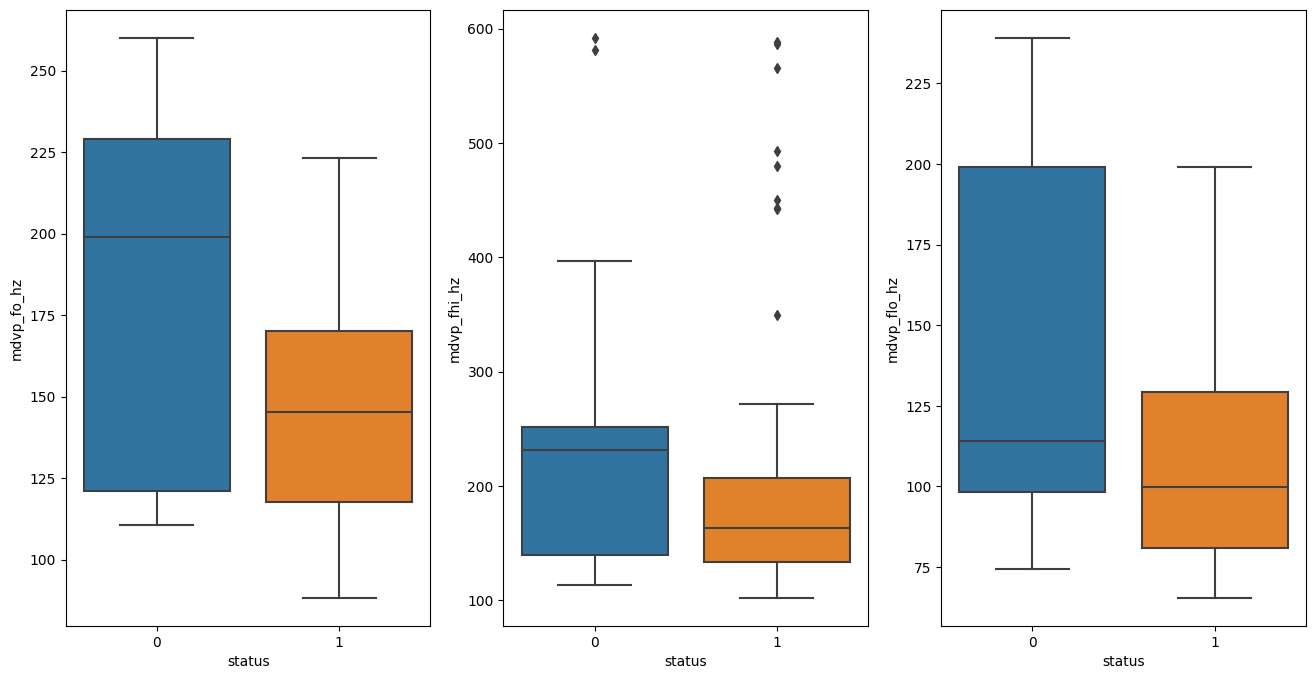

In [35]:
# Vocal frequency and DFA comparison for patients with Parkinson and not. 
fig, ax = plt.subplots(1,3,figsize=(16,8))
sns.boxplot(x='status',y='mdvp_fo_hz',data=data,ax=ax[0])
sns.boxplot(x='status',y='mdvp_fhi_hz',data=data,ax=ax[1])
sns.boxplot(x='status',y='mdvp_flo_hz',data=data,ax=ax[2])

mdvp_fo_hz
- median value patients diagnosed with Parkinson is nearly 145, in the other hand the median value of people not diagnosed with Parkinson is 200

mdvp_fhi_hz

- median value patients diagnosed with Parkinson is nearly 170, in the other hand the median value of people not diagnosed with Parkinson is 230

mdvp_flo_hz

- median value patients diagnosed with Parkinson is nearly 100, in the other hand the median value of people not diagnosed with Parkinson is 117.

-- It is obvious that the range of vocal frequency is higher for people not having Parkinson when comparing to people who have Parkinson.

C:\Users\aleks\AppData\Local\Temp\ipykernel_6612\937405786.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[data.status == 0]['dfa'], color = 'brown')
C:\Users\aleks\AppData\Local\Temp\ipykernel_6612\937405786.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[data.status == 1]['

<Axes: xlabel='dfa', ylabel='Density'>

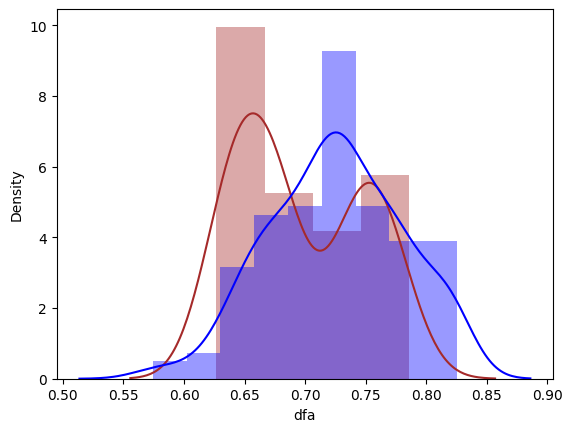

In [36]:
# dfa

sns.distplot( data[data.status == 0]['dfa'], color = 'brown')
sns.distplot( data[data.status == 1]['dfa'], color = 'blue')

Median of patients with Parkinsonis greater than the median of patients who do not have Parkinson.

In [37]:
# Let's remove multi-collinearity

In [38]:
# creating a copy of the dataset

cdata=data.copy()

In [39]:
# Let's identify the multi-collinearity by leveraging VIF (Variable Inflation Factor).

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

calc_vif(round(cdata,2))

C:\Users\aleks\Desktop\Lessons\Week_9\project_2\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,mdvp_fo_hz,53.518297
1,mdvp_fhi_hz,8.795329
2,mdvp_flo_hz,17.257065
3,mdvp_jitter_perc,7.607233
4,mdvp_jitter_abs,NaN
5,mdvp_rap,6.262228
6,mdvp_ppq,6.428414
7,jitter_ddp,17.730525
8,mdvp_shimmer,127.969986
9,mdvp_shimmer_db,179.950644


# Let's try to reduce multi-collinearity. The highest Variable Inflation Factors (VIF) belongs to dfa. So let's drop it. Since 'status' is the target variable, I should drop that too. I will also drop mdvp_jitter_abs since it is NaN. 

In [41]:
cdata=cdata.drop(['dfa','mdvp_jitter_abs','status'],axis=1)

In [42]:
# Let's see the VIF once again

calc_vif(round(cdata,2))

,variables,VIF
0,mdvp_fo_hz,43.626409
1,mdvp_fhi_hz,8.414154
2,mdvp_flo_hz,16.429654
3,mdvp_jitter_perc,7.287722
4,mdvp_rap,6.188621
5,mdvp_ppq,6.264600
6,jitter_ddp,17.151583
7,mdvp_shimmer,127.960825
8,mdvp_shimmer_db,176.304571
9,shimmer_apq3,50.830237


In [43]:
# Considering that we dropped 3 variables the VIF dropped and we can notice that. Based in that I will compare once again when trying to drop the columns with the highest VIF. 

In [44]:
cdata=cdata.drop(['mdvp_shimmer_db','spread1','mdvp_shimmer','d2','shimmer_dda','rpde','shimmer_apq5','mdvp_fo_hz',
                  'ppe','hnr','shimmer_apq3','jitter_ddp'],axis=1)

In [45]:
calc_vif(round(cdata,2))

,variables,VIF
0,mdvp_fhi_hz,5.269247
1,mdvp_flo_hz,5.313824
2,mdvp_jitter_perc,4.680998
3,mdvp_rap,4.362311
4,mdvp_ppq,3.948684
5,mdvp_apq,7.240203
6,nhr,5.278017
7,spread2,8.244022


# Split data into train and test set (70-30)

In [46]:
#classification model
#independent variables
X = cdata
# the dependent variable
y = data['status']

In [47]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [48]:
# Split of data

print("{0:0.2f}% data is in training set".format((len(X_train)/len(cdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(cdata.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [49]:
y_train_yPD=y_train[y_train==1].count()
y_train_nPD=y_train[y_train==0].count()
y_test_yPD=y_test[y_test==1].count()
y_test_nPD=y_test[y_test==0].count()

print("People who have Parkinson in the original data set are    : {0} ({1:0.2f}%)".format(len(cdata.loc[data['status'] == 1]), (len(cdata.loc[data['status'] == 1])/len(cdata.index)) * 100))
print("People who do not have Parkinson in the original data set are    : {0} ({1:0.2f}%)".format(len(data.loc[data['status'] == 0]), (len(cdata.loc[data['status'] == 0])/len(cdata.index)) * 100))
print("")
print("In the training dataset people with Parkinson    : {0} ({1:0.2f}%)".format(y_train_yPD, (y_train_yPD/len(y_train))*100))
print("In the training dataset people who didnot have Parkinson    : {0} ({1:0.2f}%)".format(y_train_nPD, (y_train_nPD/len(y_train))*100))
print("")
print("In the test dataset people with Parkinson    : {0} ({1:0.2f}%)".format(y_test_yPD, (y_test_yPD/len(y_test))*100))
print("In the training dataset people who didnot have Parkinson    : {0} ({1:0.2f}%)".format(y_test_nPD, (y_test_nPD/len(y_test))*100))

People who have Parkinson in the original data set are    : 147 (75.38%)
People who do not have Parkinson in the original data set are    : 48 (24.62%)

In the training dataset people with Parkinson    : 107 (78.68%)
In the training dataset people who didnot have Parkinson    : 29 (21.32%)

In the test dataset people with Parkinson    : 40 (67.80%)
In the training dataset people who didnot have Parkinson    : 19 (32.20%)


In [55]:
# Scaling

X_Train_copy = X_train.copy()
X_Test_copy = X_test.copy()

In [58]:
# scaler for scaling the data.
scaler = StandardScaler().fit(X_Train_copy)

In [59]:
X_train= scaler.transform(X_Train_copy)
X_test= scaler.transform(X_Test_copy)

# Let's check for null values in the sets

In [60]:
if (pd.DataFrame(X_train).isnull().sum().any()==0):
    print('In the training set, There are no null values')
else:
    print('There are null values')

if (pd.DataFrame(X_test).isnull().sum().any()==0):
    print('In the test dataset, There are no null values')
else:
    print('In the test dataset, There are null values')

In the training set, There are no null values
In the test dataset, There are no null values


In [61]:
# Training the models (Logistic Regression, k-NN)

# model on train data
model = LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [62]:
# predictions
y_predict_ln = model.predict(X_test)
y_predict_ln

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [69]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
coef_df

,0,1,2,3,4,5,6,7,intercept
0,-0.37033,-0.434062,-0.383377,0.691242,0.370025,1.111399,-0.270629,0.729314,1.986594


In [70]:
model_score_LR = model.score(X_test, y_test)
print("The Accuracy of logistic regression: {0:.4f}".format(model_score_LR))
print()

The Accuracy of logistic regression: 0.8136



Confusion Matrix

Confusion Matrix


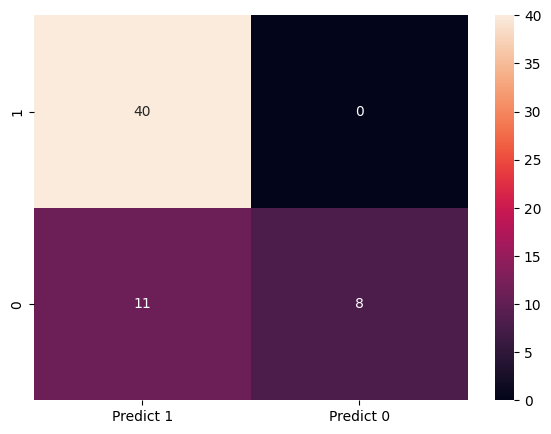

In [68]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict_ln, labels=[1, 0])

cdata_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(cdata_cm, annot=True);

Confusion matrix interpretation: 

(TP): We correctly predicted number of patients who have Parkinson, they are: 40

(TN): We did not predicted correctly the count of patients who do not have Parkinson and they didn't have Parkinson they are : 19

(FP): We incorrectly predicted the number of patients who do not have Parkinson but they actually dint have Parkinson and they are: 0

(FN): We incorrectly predicted the number of patients who do not have Parkinson who they are actually had parkinson and they are: 0

In [ ]:
print("Classification Report - Logistic Regression")
print(metrics.classification_report(y_test, y_predict_LR, labels=[1, 0]))

# Summary

The accuracy is 0.8136.